In [4]:
#!pip install torch
#!pip install torchvision
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import json
# Device configuration - If you have CUDA configured, you must use it. Try training with CPU and observe what happens
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Setting a seed for torch
'''step - Your seed will be the last 6 digits of your A# excluding any leading zeros'''
torch.manual_seed(195322) 

In [5]:
# All of our fields have names, but we need them in numbers, so define a dictionary to convert.
global magDict
magDict = {
    'TOTUSJH': 0,
    'TOTBSQ': 1,
    'TOTPOT': 2,
    'TOTUSJZ': 3,
    'ABSNJZH': 4,
    'SAVNCPP': 5,
    'USFLUX': 6,
    'TOTFZ': 7,
    'MEANPOT': 8,
    'EPSZ': 9,
    'SHRGT45': 10,
    'MEANSHR': 11,
    'MEANGAM': 12,
    'MEANGBT': 13,
    'MEANGBZ': 14,
    'MEANGBH': 15,
    'MEANJZH': 16,
    'TOTFY': 17,
    'MEANJZD': 18,
    'MEANALP': 19,
    'TOTFX': 20,
    'EPSY': 21,
    'EPSX': 22,
    'R_VALUE': 23,
    'RBZ_VALUE': 24,
    'RBT_VALUE': 25,
    'RBP_VALUE': 26,
    'FDIM': 27,
    'BZ_FDIM': 28,
    'BT_FDIM': 29,
    'BP_FDIM': 30,
    'PIL_LEN': 31,
    'XR_MAX': 32
}

In [6]:
# Get the data from the JSON file, then return it as a tensor of input data and a list of labels
def getDataFromJSON(path="train_partition1_data.json", device='cpu', earlyStop=-1):
    # I might need to refactor these arguments to allow to get the test data. Problem for another day.
    # path is the path to the files, device is where to store it (CUDA), earlyStop is how many lines to 
    # read if you don't want the entire file read.
    
    # Get the dictionary to assign names to numbers
    global magDict
    
    # Get the file and open it. Get it's size. 
    file = open(path)
    lines = file.readlines()
    if earlyStop < 0: length = len(lines)
    else: length = earlyStop
    # This file is rather large, so to not crash my computer we are doing this
    del lines
    file.seek(0)
    
    # Declare a tensor to hold the data, and a list to hold the labels.
    # Dimensions: 0: length of the file. 1: the 33 fields in the data. 2: the 60 observations in each field. 
    tnsr = torch.Tensor().new_empty((length, 33, 60), device=device)
    labels = []
        
    row = -1
    for line in file:
        # Load the line as a dictionary. Row is an integer place and v is a smaller dictionary.
        d: dict = json.loads(line)
        row += 1
        for _, v in d.items(): # we use the _ because we don't want the ID.
            if earlyStop > 0 and row >= earlyStop:
                # If we don't want the entire dataset, stop loading more than we want
                return tnsr, labels
            if row % 100 == 0:
                print(f'Now loading event {row}/{length}')
            # append the label to our list
            labels.append(v['label'])
            
            # Break each individual dictionary into dictionaries of observations
            # Key is the string in magDict, and timeDict is a dictionary of observations over time
            for key, timeDict in v['values'].items():
                # Turn our name string into a numeric value
                location = magDict[key]
                # Get the measurements out of the time series dictionary
                for timeStamp, measurement in timeDict.items():
                    tnsr[int(row)][location][int(timeStamp)] = measurement
    # Close the file. I'm not a heathen                    
    file.close()
    # This might be a good place to perform some post processing, but that's a question for another day. Famous last words.
    return tnsr, labels



In [7]:
# This file has 77270 data points. 
%time train1, labels1 = getDataFromJSON(path="train_partition1_data.json", earlyStop=5000)

Now loading event 0/5000
Now loading event 100/5000
Now loading event 200/5000
Now loading event 300/5000
Now loading event 400/5000
Now loading event 500/5000
Now loading event 600/5000
Now loading event 700/5000
Now loading event 800/5000
Now loading event 900/5000
Now loading event 1000/5000
Now loading event 1100/5000
Now loading event 1200/5000
Now loading event 1300/5000
Now loading event 1400/5000
Now loading event 1500/5000
Now loading event 1600/5000
Now loading event 1700/5000
Now loading event 1800/5000
Now loading event 1900/5000
Now loading event 2000/5000
Now loading event 2100/5000
Now loading event 2200/5000
Now loading event 2300/5000
Now loading event 2400/5000
Now loading event 2500/5000
Now loading event 2600/5000
Now loading event 2700/5000
Now loading event 2800/5000
Now loading event 2900/5000
Now loading event 3000/5000
Now loading event 3100/5000
Now loading event 3200/5000
Now loading event 3300/5000
Now loading event 3400/5000
Now loading event 3500/5000
Now 

In [8]:
# This file has 93767 data points. 
%time train2, labels2 = getDataFromJSON(path="train_partition2_data.json", earlyStop=5000)

Now loading event 0/5000
Now loading event 100/5000
Now loading event 200/5000
Now loading event 300/5000
Now loading event 400/5000
Now loading event 500/5000
Now loading event 600/5000
Now loading event 700/5000
Now loading event 800/5000
Now loading event 900/5000
Now loading event 1000/5000
Now loading event 1100/5000
Now loading event 1200/5000
Now loading event 1300/5000
Now loading event 1400/5000
Now loading event 1500/5000
Now loading event 1600/5000
Now loading event 1700/5000
Now loading event 1800/5000
Now loading event 1900/5000
Now loading event 2000/5000
Now loading event 2100/5000
Now loading event 2200/5000
Now loading event 2300/5000
Now loading event 2400/5000
Now loading event 2500/5000
Now loading event 2600/5000
Now loading event 2700/5000
Now loading event 2800/5000
Now loading event 2900/5000
Now loading event 3000/5000
Now loading event 3100/5000
Now loading event 3200/5000
Now loading event 3300/5000
Now loading event 3400/5000
Now loading event 3500/5000
Now 

In [9]:
# This file has 42986 data points. 
%time train3, labels3 = getDataFromJSON(path="train_partition3_data.json", earlyStop=5000)

Now loading event 0/5000
Now loading event 100/5000
Now loading event 200/5000
Now loading event 300/5000
Now loading event 400/5000
Now loading event 500/5000
Now loading event 600/5000
Now loading event 700/5000
Now loading event 800/5000
Now loading event 900/5000
Now loading event 1000/5000
Now loading event 1100/5000
Now loading event 1200/5000
Now loading event 1300/5000
Now loading event 1400/5000
Now loading event 1500/5000
Now loading event 1600/5000
Now loading event 1700/5000
Now loading event 1800/5000
Now loading event 1900/5000
Now loading event 2000/5000
Now loading event 2100/5000
Now loading event 2200/5000
Now loading event 2300/5000
Now loading event 2400/5000
Now loading event 2500/5000
Now loading event 2600/5000
Now loading event 2700/5000
Now loading event 2800/5000
Now loading event 2900/5000
Now loading event 3000/5000
Now loading event 3100/5000
Now loading event 3200/5000
Now loading event 3300/5000
Now loading event 3400/5000
Now loading event 3500/5000
Now 

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
train1.shape.view(100)

AttributeError: 'torch.Size' object has no attribute 'view'

In [12]:
train2.shape

torch.Size([5000, 33, 60])

In [13]:
train3.shape

torch.Size([5000, 33, 60])

In [14]:
train1[0]

tensor([[1.2663e+03, 1.2476e+03, 1.2691e+03,  ..., 1.1056e+03, 1.1100e+03,
         1.1030e+03],
        [2.5324e+10, 2.5299e+10, 2.5383e+10,  ..., 2.4020e+10, 2.4003e+10,
         2.3926e+10],
        [4.2737e+23, 4.2749e+23, 4.2985e+23,  ..., 3.9118e+23, 3.9134e+23,
         3.9095e+23],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [6.7200e+02, 7.8800e+02, 7.3400e+02,  ..., 7.5100e+02, 8.3200e+02,
         1.0040e+03],
        [6.0734e-07, 5.3174e-07, 5.1408e-07,  ..., 1.0566e-06, 9.2946e-07,
         7.9558e-07]])

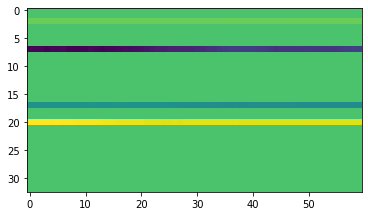

In [15]:
plt.imshow(train2[1])
plt.show()

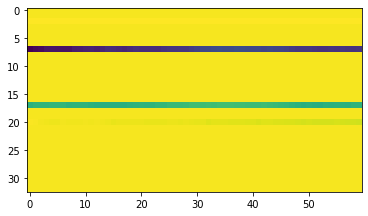

In [16]:
plt.imshow(train1[2])
plt.show()

In [17]:
train1.view(1000,1,33,60)[:,0,:,:].shape

RuntimeError: shape '[1000, 1, 33, 60]' is invalid for input of size 9900000

In [18]:
X = torch.cat((train1, train2,train3),0)
X = X.reshape(-1, 1, 33, 60)
X = X[:,:,:28,:28]
batch_size = X.shape[0]
X = X.to(torch.float)
for i in range(batch_size):
  # print(X[i])
  min_x = torch.min(X[i])
  X[i] -= min_x
  X[i] /= torch.max(X[i]).item()
X=torch.nan_to_num(X)
X.shape

torch.Size([15000, 1, 28, 28])

In [19]:
'''
Create the arquitecture 

'''

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # you can use sequential of not 
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 4, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(196, 120),
            nn.ReLU(),
            nn.Linear(120, 96),
            nn.ReLU(),
            nn.Linear(96, 64),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (4, 4, 4)),
            nn.ConvTranspose2d(4, 16, 3, stride = 1),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose2d(16, 1, 3, stride = 1),
            nn.Upsample(scale_factor=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [20]:
'''
Define your training routine,
your optimizer, your loss function.
Everything you need to train the model
'''
model = Autoencoder()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

n_epochs = 50

model.to('cpu')

train_loader = torch.utils.data.DataLoader(X, batch_size = 32, num_workers = 0)
for epoch in range(1, n_epochs+1):
  train_loss = 0.0
  for data in train_loader:
    data.to(device)
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, data)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()*data.size(0)
  train_loss /= len(train_loader)
  print(f'epoch {epoch} : \t training loss {train_loss}')


epoch 1 : 	 training loss 14.833051653050665
epoch 2 : 	 training loss 13.69419292956273
epoch 3 : 	 training loss 13.575284648805793
epoch 4 : 	 training loss 13.540135304302549
epoch 5 : 	 training loss 13.517103577473524
epoch 6 : 	 training loss 13.503751967761563
epoch 7 : 	 training loss 13.488089036331502
epoch 8 : 	 training loss 13.454423466725135
epoch 9 : 	 training loss 13.439577856551864
epoch 10 : 	 training loss 13.433676410585578
epoch 11 : 	 training loss 13.429462190884262
epoch 12 : 	 training loss 13.425375530206319
epoch 13 : 	 training loss 13.424700794443647
epoch 14 : 	 training loss 13.420114358096743
epoch 15 : 	 training loss 13.418056808300872
epoch 16 : 	 training loss 13.415546671922273
epoch 17 : 	 training loss 13.414367488706544
epoch 18 : 	 training loss 13.411254562548738
epoch 19 : 	 training loss 13.409192508725978
epoch 20 : 	 training loss 13.410953453100566
epoch 21 : 	 training loss 13.406726918495032
epoch 22 : 	 training loss 13.42462767161794

In [163]:
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=196, out_features=16, bias=True)
    (8): ReLU()
    (9): Linear(in_features=16, out_features=36, bias=True)
    (10): ReLU()
    (11): Linear(in_features=36, out_features=64, bias=True)
    (12): ReLU()
  )
  (decoder): Sequential(
    (0): Unflatten(dim=1, unflattened_size=(4, 4, 4))
    (1): ConvTranspose2d(4, 16, kernel_size=(3, 3), stride=(1, 1))
    (2): Upsample(scale_factor=2.0, mode=nearest)
    (3): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1))
    (4): Upsample(scale_factor=2.0, mode=nearest)
    (5): Sigmoid()
  )


In [21]:
X1_vector = model.encoder(X[0:,:,:,:])
X1_vector = X1_vector.detach().numpy()

In [22]:
X1_vector

array([[0.7054079 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.9616416 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.1974432 , 0.        , 0.        , ..., 0.        , 0.        ,
        2.2807355 ],
       ...,
       [1.92469   , 0.        , 0.        , ..., 0.        , 0.        ,
        3.2093105 ],
       [0.34566098, 0.        , 0.        , ..., 0.        , 0.        ,
        1.0005386 ],
       [0.29138526, 0.        , 0.        , ..., 0.        , 0.        ,
        0.19747312]], dtype=float32)

In [51]:
#k-mean analysis
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X1_vector)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
#k-mean labels
kmeans.labels_

array([4, 1, 2, ..., 9, 5, 8], dtype=int32)

In [130]:
X1_fit

array([[0.02209709, 0.        , 0.02209709],
       [0.02209709, 0.        , 0.02209709],
       [0.02209709, 0.        , 0.02209709],
       ...,
       [0.02209709, 0.        , 0.02209709],
       [0.02209709, 0.        , 0.02209709],
       [0.02209709, 0.        , 0.02209709]], dtype=float32)

In [26]:
from sklearn.manifold import TSNE

In [27]:
#turn vectors into two dimensions
X_embed = TSNE(n_components=2).fit_transform(X1_vector)

In [28]:
X_embed.shape

(15000, 2)

In [29]:
x_em = X_embed[:, 0]
y_em = X_embed[:,1]

In [34]:
original = np.array([0]*5000+[1]*5000+[2]*5000)

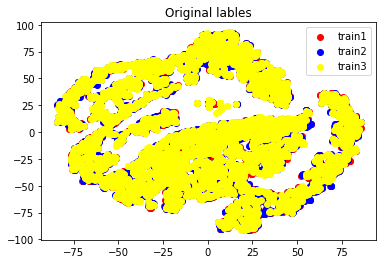

In [57]:
# labeled by partition
plt.scatter(x_em[:5000], y_em[:5000], c= 'red',label = 'train1')
plt.scatter(x_em[5000:10000], y_em[5000:10000], c='blue', label = 'train2')
plt.scatter(x_em[10000:15000], y_em[10000:15000], c='yellow', label = 'train3')
plt.legend()
plt.title('Original lables')
plt.show()

In [50]:
X1_vector[3]

array([0.47734237, 0.        , 0.        , 0.        , 7.7375927 ,
       6.6490107 , 0.        , 0.        , 4.360107  , 0.        ,
       0.        , 0.128243  , 6.451693  , 1.8022472 , 0.2515224 ,
       3.0486207 , 6.111988  , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 8.124959  , 0.        , 0.        , 0.7883106 ,
       5.328088  , 5.515572  , 0.        , 0.        , 4.2596345 ,
       1.3861593 , 0.        , 0.        , 6.494928  , 0.        ,
       0.        , 0.        , 1.0775927 , 0.        , 0.        ,
       0.        , 0.        , 4.793183  , 0.        , 8.171903  ,
       0.        , 6.3967543 , 0.5637827 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.31278116], dtype=float32)

In [33]:
kmeans.labels_

array([4, 1, 2, ..., 9, 5, 8], dtype=int32)

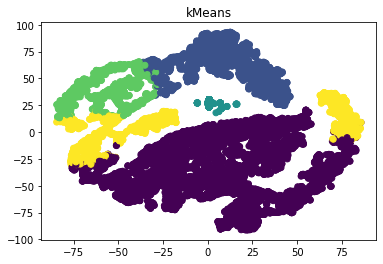

In [52]:
# This is labeled with the KMeans labels
plt.scatter(x_em, y_em, c=kmeans.labels_)
plt.title('kMeans')
plt.show()